In [1]:

import seaborn as sn
import fnmatch
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils import data
import numpy as np
import torchvision
from  numpy import exp,absolute
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import math
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier as mlp
import torch
import torch.nn as nn
import torchvision.models as models
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from joblib import Parallel, delayed
from sklearn.model_selection import StratifiedKFold
import warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
dataset_path = './only_relevant_dataset'
classes = [10,11,14,16,6,7] #arranged in order of their placement in the folder
num_classes = len(classes)
test_size = 0.25  # Test set size (20%)


In [3]:
image_paths = []
labels = []

for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            image_paths.append(image_path)
            labels.append(folder_name)

# Step 2: Preprocess the images and extract features
features = []
for image_path in image_paths:
    image = imread(image_path, as_gray=True)  # Read the image as grayscale
    image = resize(image, (30, 30))  # Resize to a consistent size
    image_vector = image.flatten()  # Convert 2D image to 1D feature vector
    features.append(image_vector)

# Convert the features and labels to numpy arrays
X = np.array(features)
y = np.array(labels)


pca = PCA(n_components=6)  # Specify the desired number of components
X = pca.fit_transform(X)

# Step 4: Split the dataset using stratified shuffle split
stratified_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
train_indices, test_indices = next(stratified_shuffle_split.split(X, y))

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

In [4]:
print(y_train[:10])

['14' '14' '11' '14' '7' '10' '14' '14' '14' '7']


In [5]:
print(len(X_train),len(X_test))

10620 3540


In [6]:
total_iterations = len(X_train)
model_svc = SVC(decision_function_shape='ovr', degree = 3, C=1e-5, kernel='rbf', max_iter = 100)
progress_bar = tqdm(total=total_iterations, desc="Training Progress")
progress_bar.reset()
warnings.filterwarnings("ignore", category=ConvergenceWarning)

for i in range(total_iterations):

    # Update the progress bar
    ##progress_bar.update(1)
    
    # Train on a single sample
    model_svc.fit(X_train,y_train)

            
    if i % 100 == 0:
                
        partial_pred = model_svc.predict(X_test[:100])
        partial_acc = accuracy_score(y_test[:100], partial_pred)
        partial_balanced = balanced_accuracy_score(y_test[:100], partial_pred)
        print('Partial Accuracy for SVM:', partial_acc)
        print('Partial Balanced Accuracy for SVM:', partial_balanced)

        # Close the progress bar
progress_bar.close()

Training Progress:   0%|                                                                      | 0/10620 [00:00<?, ?it/s]

Partial Accuracy for SVM: 0.22
Partial Balanced Accuracy for SVM: 0.2368326118326118
Partial Accuracy for SVM: 0.22
Partial Balanced Accuracy for SVM: 0.2368326118326118
Partial Accuracy for SVM: 0.22
Partial Balanced Accuracy for SVM: 0.2368326118326118
Partial Accuracy for SVM: 0.22
Partial Balanced Accuracy for SVM: 0.2368326118326118
Partial Accuracy for SVM: 0.22
Partial Balanced Accuracy for SVM: 0.2368326118326118
Partial Accuracy for SVM: 0.22
Partial Balanced Accuracy for SVM: 0.2368326118326118
Partial Accuracy for SVM: 0.22
Partial Balanced Accuracy for SVM: 0.2368326118326118
Partial Accuracy for SVM: 0.22
Partial Balanced Accuracy for SVM: 0.2368326118326118
Partial Accuracy for SVM: 0.22
Partial Balanced Accuracy for SVM: 0.2368326118326118
Partial Accuracy for SVM: 0.22
Partial Balanced Accuracy for SVM: 0.2368326118326118
Partial Accuracy for SVM: 0.22
Partial Balanced Accuracy for SVM: 0.2368326118326118
Partial Accuracy for SVM: 0.22
Partial Balanced Accuracy for SVM:

Training Progress:   0%|                                                                      | 0/10620 [40:45<?, ?it/s]


Accuracy for SVM: 0.21779661016949153
Balanced Accuracy:0.2175903477101955


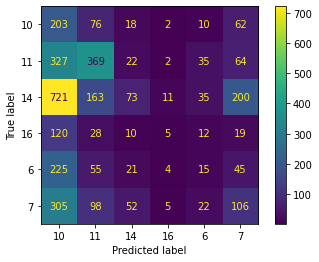

<Figure size 576x432 with 0 Axes>

In [7]:
pred = model_svc.predict(X_test)
acc = accuracy_score(y_test, pred)
print('Accuracy for SVM: ' + str(acc))
balanced_svm = balanced_accuracy_score(y_test, pred)  # Calculate balanced accuracy
print("Balanced Accuracy:"+ str(balanced_svm))
# Confusion Matrix
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes )
disp.plot()
plt.figure(figsize=(8, 6))
plt.show()

In [8]:
total_iterations = len(X_train)
model_mlp = mlp(solver='adam', alpha=1e-9, random_state=5, max_iter=1, batch_size=256)
progress_bar = tqdm(total=total_iterations, desc="Training Progress")
progress_bar.reset()
warnings.filterwarnings("ignore", category=ConvergenceWarning)

for i in range(total_iterations):

    # Update the progress bar
    #progress_bar.update(1)
    
    # Train on a single sample
    model_mlp.fit(X_train,y_train)

            
    if i % 100 == 0:
                
        partial_pred = model_mlp.predict(X_test[:100])
        partial_acc = accuracy_score(y_test[:100], partial_pred)
        partial_balanced = balanced_accuracy_score(y_test[:100], partial_pred)
        print('Partial Accuracy for SVM:', partial_acc)
        print('Partial Balanced Accuracy for SVM:', partial_balanced)

        # Close the progress bar
progress_bar.close()

Training Progress:   0%|                                                                      | 0/10620 [00:00<?, ?it/s]

Partial Accuracy for SVM: 0.52
Partial Balanced Accuracy for SVM: 0.26046176046176045
Partial Accuracy for SVM: 0.52
Partial Balanced Accuracy for SVM: 0.26046176046176045
Partial Accuracy for SVM: 0.52
Partial Balanced Accuracy for SVM: 0.26046176046176045
Partial Accuracy for SVM: 0.52
Partial Balanced Accuracy for SVM: 0.26046176046176045
Partial Accuracy for SVM: 0.52
Partial Balanced Accuracy for SVM: 0.26046176046176045
Partial Accuracy for SVM: 0.52
Partial Balanced Accuracy for SVM: 0.26046176046176045
Partial Accuracy for SVM: 0.52
Partial Balanced Accuracy for SVM: 0.26046176046176045
Partial Accuracy for SVM: 0.52
Partial Balanced Accuracy for SVM: 0.26046176046176045
Partial Accuracy for SVM: 0.52
Partial Balanced Accuracy for SVM: 0.26046176046176045
Partial Accuracy for SVM: 0.52
Partial Balanced Accuracy for SVM: 0.26046176046176045
Partial Accuracy for SVM: 0.52
Partial Balanced Accuracy for SVM: 0.26046176046176045
Partial Accuracy for SVM: 0.52
Partial Balanced Accura

Training Progress:   0%|                                                                      | 0/10620 [04:17<?, ?it/s]


Accuracy for SVM: 0.45847457627118643
Balanced Accuracy:0.26486843751717287


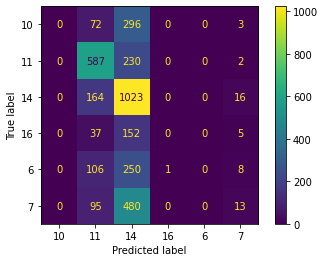

<Figure size 576x432 with 0 Axes>

In [9]:
pred = model_mlp.predict(X_test)
acc = accuracy_score(y_test, pred)
print('Accuracy for SVM: ' + str(acc))
balanced_svm = balanced_accuracy_score(y_test, pred)  # Calculate balanced accuracy
print("Balanced Accuracy:"+ str(balanced_svm))
# Confusion Matrix
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes )
disp.plot()
plt.figure(figsize=(8, 6))
plt.show()